In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error

In [2]:
path = '/Users/alexandra/Desktop/ML research/'

In [3]:
#using all inputs 
y = pd.read_excel(path + 'features.xlsx', usecols=['percent_duration_ai'])
x = pd.read_excel(path + 'features.xlsx', 
                  usecols=[
                            'total_duration',
                            #'percent_duration_ai',
                            #'total_duration_on_ai',
                            
                            #might be not needed 
                           'Trust',
                           'Familiarity',
                           'Age',
                           'Education',
                           'Gender',
                           
                           
                           'percent_duration_task',
                           'total_duration_on_task',
                           'percent_duration_user', 
                           'total_duration_on_user', 
                           'first_ai_start_time', 
                           'first_ai_duration',
                           'count_ai2task', 
                           'percent_shift_ai2task', 
                           'count_ai2user',
                           'percent_shift_ai2user',
                           'count_task2user', 
                           'percent_shift_task2user',
                           'count_task2ai', 
                           'percent_shift_task2ai',
                           'count_user2ai',
                           'percent_shift_user2ai',
                           'count_user2task', 
                           'percent_shift_user2task', 
                           'percent_shift_2ai', 
                           'percent_shift_2user', 
                           'count_2task',
                           'count_2ai', 
                           'count_2user',
                           'start_user_ai_acc',
                           'Orientation'])

#user 45, 46, 47, 48 for test, unshuffled data 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.11, shuffle = False)
reg = LinearRegression().fit(x_train, y_train)

y_hat = reg.predict(x_test)

r_square = mean_squared_error(y_test, y_hat)
print(f"mean_squared_error: {r_square}")

cod = reg.score(x_train, y_train)
print(f"coefficient of determination: {cod}")

mean_squared_error: 0.0006065759050563836
coefficient of determination: 0.8261014852809235


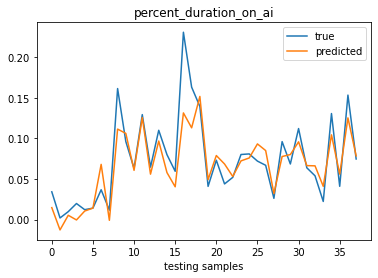

In [4]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="true")
plt.plot(x_ax, y_hat, label="predicted")
plt.title("percent_duration_on_ai")
plt.xlabel("testing samples")
plt.legend()
plt.show()

coefficient of determination: 0.8025442314746825
mean_squared_error: 0.000504859746579642


Text(0, 0.5, 'square_loss')

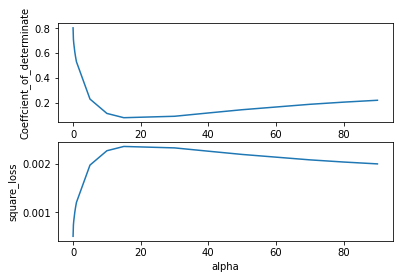

In [5]:
#regularization 
from sklearn.linear_model import Ridge

#best
reg = Ridge(alpha=0).fit(x_train,y_train)
y_hat = reg.predict(x_test)
r_square = mean_squared_error(y_test, y_hat)
cod = reg.score(x_test,y_test)
print(f"coefficient of determination: {cod}")
print(f"mean_squared_error: {r_square}")

#gidge research in Ridge regularization
a = [0, 0.1, 0.2, 0.5, 0.7, 0.8, 1, 5, 10, 15, 30, 40, 50, 70, 80, 90]
R_2 = []
Y = []
sq_loss = []
for i in a:
    reg = Ridge(alpha=i).fit(x_train,y_train)
    y_hat = reg.predict(x_test)
    r_square = mean_squared_error(y_test, y_hat)
    cod = reg.score(x_test,y_test)
    R_2.append(cod)
    Y.append(i)
    sq_loss.append(r_square)
    

plt.subplot(2, 1, 1)
plt.plot(Y,R_2)
plt.xlabel("alpha")
plt.ylabel("Coeffcient_of_determinate")
plt.subplot(2, 1, 2)
plt.plot(Y,sq_loss)
plt.xlabel("alpha")
plt.ylabel("square_loss")

coefficient of determination: 0.3113609287785388
mean_squared_error: 0.0017607292487741614


Text(0, 0.5, 'square_loss')

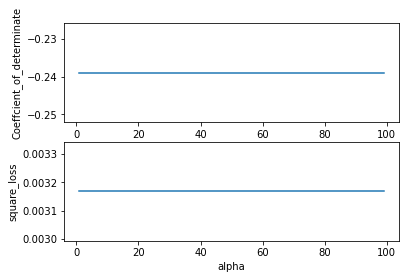

In [6]:
from sklearn.linear_model import Lasso

#best
reg = Lasso(alpha=0.1).fit(x_train,y_train)
y_hat = reg.predict(x_test)
r_square = mean_squared_error(y_test, y_hat)
cod = reg.score(x_test,y_test)
print(f"coefficient of determination: {cod}")
print(f"mean_squared_error: {r_square}")

R_2 = []
Y = []
sq_loss = []
#Lasso regularization
for i in range(1,100,1):
    reg = Lasso(alpha=i).fit(x_train,y_train)
    y_hat = reg.predict(x_test)
    r_square = mean_squared_error(y_test, y_hat)
    cod = reg.score(x_test,y_test)
    R_2.append(cod)
    Y.append(i)
    sq_loss.append(r_square)
    
    
    
plt.subplot(2, 1, 1)
plt.plot(Y,R_2)
plt.xlabel("alpha")
plt.ylabel("Coeffcient_of_determinate")
plt.subplot(2, 1, 2)
plt.plot(Y,sq_loss)
plt.xlabel("alpha")
plt.ylabel("square_loss")

In [7]:
#using only precent
y = pd.read_excel(path + 'features.xlsx', usecols=['percent_duration_ai'])
x = pd.read_excel(path + 'features.xlsx', 
                  usecols=[
                            'total_duration',
                            #'percent_duration_ai',
                            #'total_duration_on_ai',
                            
                            #might be not needed 
                           'Trust',
                           'Familiarity',
                           'Age',
                           'Education',
                           'Gender',
                           
                           
                           'percent_duration_task',
                           #'total_duration_on_task',
                           'percent_duration_user', 
                           #'total_duration_on_user', 
                           'first_ai_start_time', 
                           'first_ai_duration',
                           #'count_ai2task', 
                           'percent_shift_ai2task', 
                           #'count_ai2user',
                           'percent_shift_ai2user',
                           #'count_task2user', 
                           'percent_shift_task2user',
                           #'count_task2ai', 
                           'percent_shift_task2ai',
                           #'count_user2ai',
                           'percent_shift_user2ai',
                           #'count_user2task', 
                           'percent_shift_user2task', 
                           'percent_shift_2ai', 
                           'percent_shift_2user', 
                           #'count_2task',
                           #'count_2ai', 
                           #'count_2user',
                           'start_user_ai_acc',
                           'Orientation'])

#user 45, 46, 47, 48 for test, unshuffled data 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.11, shuffle = False)
reg = LinearRegression().fit(x_train, y_train)

y_hat = reg.predict(x_test)

r_square = mean_squared_error(y_test, y_hat)
print(f"mean_squared_error: {r_square}")

cod = reg.score(x_train, y_train)
print(f"coefficient of determination: {cod}")

mean_squared_error: 0.0006298704756959438
coefficient of determination: 0.7906645992551445


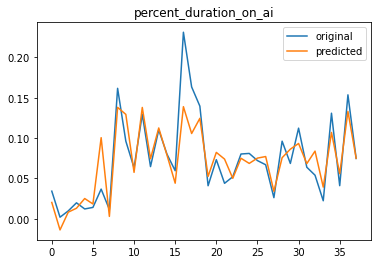

In [8]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="true")
plt.plot(x_ax, y_hat, label="predicted")
plt.title("percent_duration_on_ai")
plt.xlabel("testing samples")
plt.legend()
plt.show()

coefficient of determination: 0.7668423335643735
mean_squared_error: 0.0005961432338437774


Text(0, 0.5, 'square_loss')

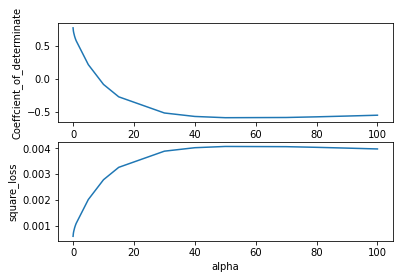

In [9]:
#regularization 
from sklearn.linear_model import Ridge

#best
reg = Ridge(alpha=0).fit(x_train,y_train)
y_hat = reg.predict(x_test)
r_square = mean_squared_error(y_test, y_hat)
cod = reg.score(x_test,y_test)
print(f"coefficient of determination: {cod}")
print(f"mean_squared_error: {r_square}")

#gidge research in Ridge regularization
a = [0, 0.1, 0.2, 0.5, 0.7, 0.8, 1, 5, 10, 15, 30, 40, 50, 70, 80, 90, 100]
R_2 = []
Y = []
sq_loss = []
for i in a:
    reg = Ridge(alpha=i).fit(x_train,y_train)
    y_hat = reg.predict(x_test)
    r_square = mean_squared_error(y_test, y_hat)
    cod = reg.score(x_test,y_test)
    R_2.append(cod)
    Y.append(i)
    sq_loss.append(r_square)
    
plt.subplot(2, 1, 1)
plt.plot(Y,R_2)
plt.xlabel("alpha")
plt.ylabel("Coeffcient_of_determinate")
plt.subplot(2, 1, 2)
plt.plot(Y,sq_loss)
plt.xlabel("alpha")
plt.ylabel("square_loss")


coefficient of determination: -0.1940484289155735
mean_squared_error: 0.003052972276922072


Text(0, 0.5, 'square_loss')

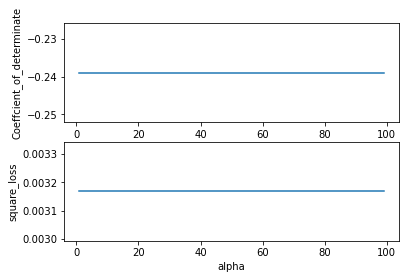

In [10]:
from sklearn.linear_model import Lasso

#best
reg = Lasso(alpha=0.01).fit(x_train,y_train)
y_hat = reg.predict(x_test)
r_square = mean_squared_error(y_test, y_hat)
cod = reg.score(x_test,y_test)
print(f"coefficient of determination: {cod}")
print(f"mean_squared_error: {r_square}")

R_2 = []
Y = []
sq_loss = []
#Lasso regularization
for i in range(1,100,1):
    reg = Lasso(alpha=i).fit(x_train,y_train)
    y_hat = reg.predict(x_test)
    r_square = mean_squared_error(y_test, y_hat)
    cod = reg.score(x_test,y_test)
    R_2.append(cod)
    Y.append(i)
    sq_loss.append(r_square)
    
plt.subplot(2, 1, 1)
plt.plot(Y,R_2)
plt.xlabel("alpha")
plt.ylabel("Coeffcient_of_determinate")
plt.subplot(2, 1, 2)
plt.plot(Y,sq_loss)
plt.xlabel("alpha")
plt.ylabel("square_loss")

In [11]:
#using only counts
y = pd.read_excel(path + 'features.xlsx', usecols=['percent_duration_ai'])
x = pd.read_excel(path + 'features.xlsx', 
                  usecols=[
                            'total_duration',
                            #'percent_duration_ai',
                            #'total_duration_on_ai',
                            
                            #might be not needed 
                           'Trust',
                           'Familiarity',
                           'Age',
                           'Education',
                           'Gender',
                           
                           
                           'percent_duration_task',
                           #'total_duration_on_task',
                           'percent_duration_user', 
                           #'total_duration_on_user', 
                           'first_ai_start_time', 
                           'first_ai_duration',
                           'count_ai2task', 
                           #'percent_shift_ai2task', 
                           'count_ai2user',
                           #'percent_shift_ai2user',
                           'count_task2user', 
                           #'percent_shift_task2user',
                           'count_task2ai', 
                           #'percent_shift_task2ai',
                           'count_user2ai',
                           #'percent_shift_user2ai',
                           'count_user2task', 
                           #'percent_shift_user2task', 
                           #'percent_shift_2ai', 
                           #'percent_shift_2user', 
                           'count_2task',
                           'count_2ai', 
                           'count_2user',
                           'start_user_ai_acc',
                           'Orientation'])

#user 45, 46, 47, 48 for test, unshuffled data 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.11, shuffle = False)
reg = LinearRegression().fit(x_train, y_train)

y_hat = reg.predict(x_test)

r_square = mean_squared_error(y_test, y_hat)
print(f"mean_squared_error: {r_square}")

cod = reg.score(x_train, y_train)
print(f"coefficient of determination: {cod}")

mean_squared_error: 0.0008185293322894663
coefficient of determination: 0.7529120175450392


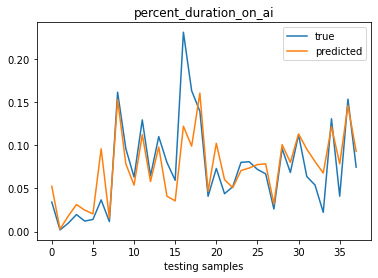

In [12]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="true")
plt.plot(x_ax, y_hat, label="predicted")
plt.title("percent_duration_on_ai")
plt.xlabel("testing samples")
plt.legend()
plt.show()

coefficient of determination: 0.6220878558642408
mean_squared_error: 0.000966255028873899


Text(0, 0.5, 'square_loss')

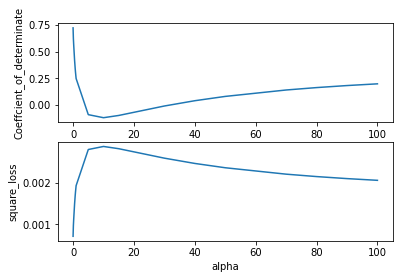

In [13]:
#best
reg = Ridge(alpha=0.1).fit(x_train,y_train)
y_hat = reg.predict(x_test)
r_square = mean_squared_error(y_test, y_hat)
cod = reg.score(x_test,y_test)
print(f"coefficient of determination: {cod}")
print(f"mean_squared_error: {r_square}")

#gidge research in Ridge regularization
a = [0, 0.1, 0.2, 0.5, 0.7, 0.8, 1, 5, 10, 15, 30, 40, 50, 70, 80, 90, 100]
R_2 = []
Y = []
sq_loss = []
for i in a:
    reg = Ridge(alpha=i).fit(x_train,y_train)
    y_hat = reg.predict(x_test)
    r_square = mean_squared_error(y_test, y_hat)
    cod = reg.score(x_test,y_test)
    R_2.append(cod)
    Y.append(i)
    sq_loss.append(r_square)
    
plt.subplot(2, 1, 1)
plt.plot(Y,R_2)
plt.xlabel("alpha")
plt.ylabel("Coeffcient_of_determinate")
plt.subplot(2, 1, 2)
plt.plot(Y,sq_loss)
plt.xlabel("alpha")
plt.ylabel("square_loss")


coefficient of determination: 0.39316668052314085
mean_squared_error: 0.001551566298494279


Text(0, 0.5, 'square_loss')

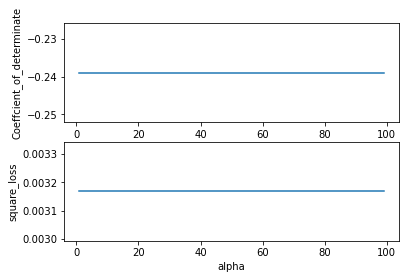

In [14]:
#best
reg = Lasso(alpha=0.01).fit(x_train,y_train)
y_hat = reg.predict(x_test)
r_square = mean_squared_error(y_test, y_hat)
cod = reg.score(x_test,y_test)
print(f"coefficient of determination: {cod}")
print(f"mean_squared_error: {r_square}")

R_2 = []
Y = []
sq_loss = []
#Lasso regularization
for i in range(1,100,1):
    reg = Lasso(alpha=i).fit(x_train,y_train)
    y_hat = reg.predict(x_test)
    r_square = mean_squared_error(y_test, y_hat)
    cod = reg.score(x_test,y_test)
    R_2.append(cod)
    Y.append(i)
    sq_loss.append(r_square)
    
    
plt.subplot(2, 1, 1)
plt.plot(Y,R_2)
plt.xlabel("alpha")
plt.ylabel("Coeffcient_of_determinate")
plt.subplot(2, 1, 2)
plt.plot(Y,sq_loss)
plt.xlabel("alpha")
plt.ylabel("square_loss")

!!!best regularization results!!!

#all features, no regularziation
mean_squared_error: 1.7914600002476555
coefficient of determination: 0.3077191232312704

#all features, ridge
coefficient of determination: 0.2515105735820655
mean_squared_error: 1.7789582489379163

#all features, lasso
coefficient of determination: 0.24027562716948891
mean_squared_error: 1.805660697752295

#only presents with precent time
mean_squared_error: 1.7155543419408281
coefficient of determination: 0.24033927394215238

#only presents, ridge
coefficient of determination: 0.27387619907761507
mean_squared_error: 1.7258011667351973

#only presents, lasso
coefficient of determination: 0.15410245118576926
mean_squared_error: 2.0104711825003045

#only counts with total time
mean_squared_error: 1.6082633718893664
coefficient of determination: 0.26873265874852037

#only counts, ridge
coefficient of determination: 0.3212273817084039
mean_squared_error: 1.6132601287927684

#only counts, ridge
coefficient of determination: 0.31583452675252743
mean_squared_error: 1.6260774959732174

In sum, I tried using all features, use only precent, use only counts for testing linear regression model.

Previsously, I included the post survey value (confidence, trust, and agreement), that result looks a lot better. After removing those inputs, so far the best is useing only counts with applying a little bit of ridge regression. 

the correlation matrix also shown that the counts are better related with survey reliance. 

I think the data is slightly overfitting, because the square los seems best with a little bit of ridge regularization applied. Most of the time, the model perform at its best state without any regularization applied. 